<a href="https://colab.research.google.com/github/mitali-datascientist/Deep-Learning-with-Keras-/blob/master/Creating_First_Neural_Network_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## Importing libraries 
from sklearn.datasets import make_blobs
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
## Import and set os environment to avoid tensorflow warnings 
import os 
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [0]:
## Plot data on figure 
def plot_data(pl, X, y) : 
  #plot class  where y==0 
  pl.plot(X[y==0,0],X[y==0,1], 'ob', alpha = 0.5)
  #plot class  where y==1 
  pl.plot(X[y==1,0],X[y==1,1], 'xr', alpha = 0.5)
  pl.legend(['0', '1'])
  pl.show()


In [0]:
## Function that draws decision boundaries 
def plot_decision_boundaries (model, X, y) : 
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt

In [0]:
# Generate some data blobs.  Data will be either 0 or 1 when 2 is number of centers.
# X is a [number of samples, 2] sized array. X[sample] contains its x,y position of the sample in the space
# ex: X[1] = [1.342, -2.3], X[2] = [-4.342, 2.12]
# y is a [number of samples] sized array. y[sample] contains the class index (ie. 0 or 1 when there are 2 centers)
# ex: y[1] = 0 , y[1] = 1
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)


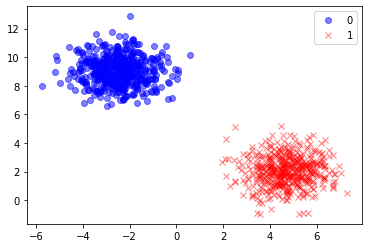

In [15]:
pl = plot_data(plt, X, y)

In [0]:
# Split the data into Training and Test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
# Create the keras model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


Using TensorFlow backend.


In [0]:
#   Simple Sequential model
model = Sequential()

In [0]:
#   Add a Dense Fully Connected Layer with 1 neuron.  Using input_shape = (2,) says the input will 
#       be arrays of the form (*,2).  The first dimension will be an unspecified 
#       number of batches (rows) of data.  The second dimension is 2 which are the X, Y positions of each data element.
#       The sigmoid activation function is used to return 0 or 1, signifying the data 
#       cluster the position is predicted to belong to.
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))

In [0]:
#   Compile the model.  Minimize crossentopy for a binary.  Maximize for accuracy
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [16]:
#   Fit the model with the data from make_blobs.  Make 100 cycles through the data.
#       Set verbose to 0 to supress progress messages 
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
700/700 [==============================] - 0s 114us/step - loss: 0.1494 - accuracy: 0.9257
Epoch 2/100
700/700 [==============================] - 0s 39us/step - loss: 0.0077 - accuracy: 1.0000
Epoch 3/100
700/700 [==============================] - 0s 37us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 4/100
700/700 [==============================] - 0s 37us/step - loss: 0.0041 - accuracy: 1.0000
Epoch 5/100
700/700 [==============================] - 0s 38us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 6/100
700/700 [==============================] - 0s 35us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 7/100
700/700 [==============================] - 0s 33us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 8/100
700/700 [==============================] - 0s 32us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 9/100
700/700 [==============================] - 0s 32us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 10/100
700/700 [==============================] - 0s 32us/step - loss: 0.00

In [17]:
#   Get loss and accuracy on test data
eval_result = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 70us/step


In [18]:
#   Print test accuracy
print("\n\nTest loss:", eval_result[0], "Test accuracy:", eval_result[1])



Test loss: 2.2477249355385236e-05 Test accuracy: 1.0


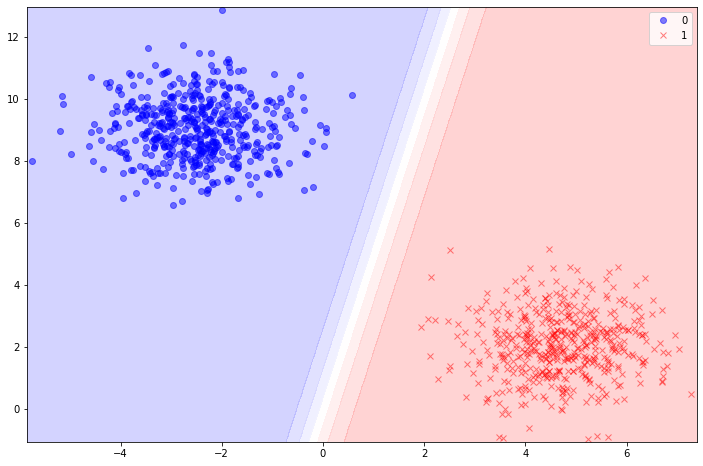

In [19]:
#   Plot the decision boundary
plot_decision_boundaries(model, X, y).show()
